In [1]:
#Import Dependencies

import psycopg2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from config import pwd

In [2]:
#Connection

conn = psycopg2.connect(
    host="localhost",
    port= 5432,
    database="sqlchallenge",
    user="postgres",
    password= pwd)

In [3]:
#Load Data into Dataframes

select = "Select * from salaries"
select2 = "Select * from titles"
select3 = "Select * from employees"
df_salary = pd.read_sql(select, conn)
df_titles = pd.read_sql(select2, conn)
df_employees = pd.read_sql(select3, conn)

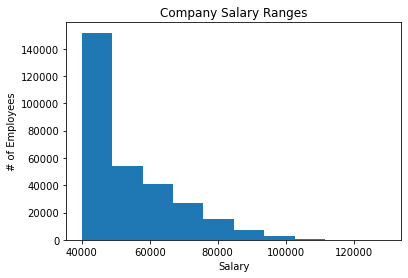

In [11]:
# Histogram of Salary Bonus Chart 1 
plt.hist(df_salary['salary'])
plt.xlabel("Salary")
plt.ylabel("# of Employees")
plt.title("Company Salary Ranges")
plt.show()
plt.savefig("Company_Salary_Ranges.png")

In [5]:
emp_no_title_no_salary = df_employees.merge(df_salary, on='emp_no')
emp_no_title_no_salary.rename(columns = {'emp_title_id':'title_id'}, inplace = True)
salary_by_pos_df = emp_no_title_no_salary.merge(df_titles, on='title_id')
salary_by_pos_df.head()


,emp_no,title_id,brith_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


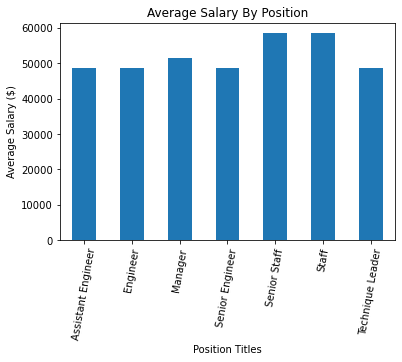

In [10]:
pd.set_option("display.precision", 0)
positions = salary_by_pos_df.groupby(['title'])['salary'].mean()
positions.plot.bar()
plt.title("Average Salary By Position")
plt.xticks(rotation=80)
plt.xlabel("Position Titles")
plt.ylabel("Average Salary ($)")
plt.show()
plt.savefig("Avg_Salary_by_Postion.png")

In [7]:
conn.close()